## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l1_ratio=1e-4,l2_ratio=1e-4):
    input_layer=keras.layers.Input(input_shape)
    
    for i ,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(n_units,
                                activation='relu',
                                name='hidden_layer'+str(i+1),
                                kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(input_layer)
        else:
            x=keras.layers.Dense(n_units,
                                 activation='relu',
                                name='hidden_layer'+str(i+1),
                                kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(x)
    out=keras.layers.Dense(output_units,activation='softmax',name='output')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [18]:
#設定超參數
lr_r=5e-3
epochs=50
batch_size=256
momentum=0.95
l1_exp=[1e-2,1e-4,1e-8,1e-12]
l2_exp=[1e-2,1e-4,1e-8,1e-12]

In [24]:

results = {}
for l1,l2 in zip(l1_exp, l2_exp):
    keras.backend.clear_session()
    print('Experiment with Regularizer=%.6f'%(l1))
    model=build_mlp(x_train.shape[1:],l1_ratio=l1,l2_ratio=l2)
    model.summary()
    optimizer=keras.optimizers.SGD(lr=lr_r,nesterov=True,momentum=momentum)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train,y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    results[l1] = {'train-loss': train_loss,
                   'valid-loss': valid_loss,
                   'train-acc': train_acc,
                   'valid-acc': valid_acc}

Experiment with Regularizer=0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 8s 170us/step - loss: 3.0891 - accuracy: 0.0992 - val_loss: 3.0886 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 169us/step - loss: 3.0892 - accuracy: 0.0984 - val_loss: 3.0884 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 170us/step - loss: 3.0892 - accuracy: 0.0978 - val_loss: 3.0883 - val_accuracy: 0.1000
Experiment with Regularizer=0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4357 - accuracy: 0.5971 - val_loss: 1.6288 - val_accuracy: 0.5279
Epoch 47/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.4302 - accuracy: 0.5962 - val_loss: 1.6482 - val_accuracy: 0.5252
Epoch 48/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.4306 - accuracy: 0.5974 - val_loss: 1.6011 - val_accuracy: 0.5355
Epoch 49/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.4217 - accuracy: 0.5986 - val_loss: 1.7219 - val_accuracy: 0.4941
Epoch 50/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4181 - accuracy: 0.6013 - val_loss: 1.6763 - val_accuracy: 0.5156
Experiment with Regularizer=0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

50000/50000 [==============================] - 8s 168us/step - loss: 0.5301 - accuracy: 0.8132 - val_loss: 1.7049 - val_accuracy: 0.5336
Epoch 44/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5121 - accuracy: 0.8185 - val_loss: 1.8020 - val_accuracy: 0.5281
Epoch 45/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.4978 - accuracy: 0.8250 - val_loss: 1.7127 - val_accuracy: 0.5310
Epoch 46/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.4729 - accuracy: 0.8328 - val_loss: 1.8875 - val_accuracy: 0.5223
Epoch 47/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.4715 - accuracy: 0.8327 - val_loss: 1.8902 - val_accuracy: 0.5319
Epoch 48/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.4367 - accuracy: 0.8476 - val_loss: 1.8858 - val_accuracy: 0.5272
Epoch 49/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.4246 - accuracy: 0.8500 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5836 - accuracy: 0.7929 - val_loss: 1.6756 - val_accuracy: 0.5310
Epoch 42/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5593 - accuracy: 0.8032 - val_loss: 1.6802 - val_accuracy: 0.5412
Epoch 43/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5446 - accuracy: 0.8062 - val_loss: 1.6677 - val_accuracy: 0.5380
Epoch 44/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5197 - accuracy: 0.8180 - val_loss: 1.7849 - val_accuracy: 0.5278
Epoch 45/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.5036 - accuracy: 0.8224 - val_loss: 1.8212 - val_accuracy: 0.5198
Epoch 46/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.4951 - accuracy: 0.8249 - val_loss: 1.8202 - val_accuracy: 0.5277
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.4705 - accuracy: 0.8340

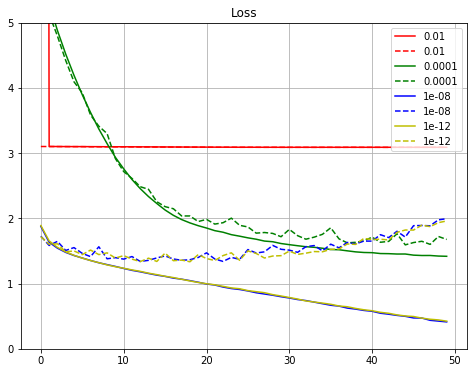

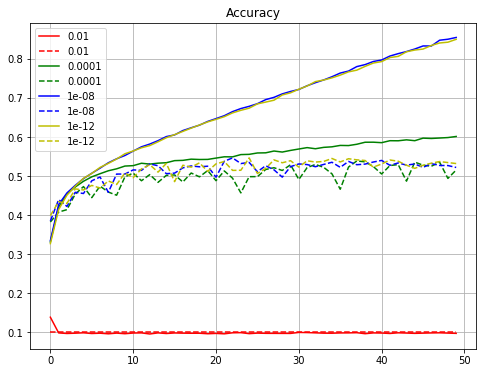

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar=['r','g','b','y','m','k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(epochs),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(epochs),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(epochs),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(epochs),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
#plt.ylim([0.2, 0.8])
plt.legend()
plt.grid()
plt.show()